In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import folium

import geopandas as gpd

In [91]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [92]:
# read the xlsx file
df = pd.read_excel('data.xlsx')

In [93]:
# Handle missing values
df = df.replace('NS', np.nan)
df = df.replace('NaN', np.nan)

/var/folders/dj/g0l_f87n7_s6rn4z7sbs4rxh0000gn/T/ipykernel_6840/3262523692.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('NS', np.nan)


In [94]:
df

,Study,Country,AI system name/ developer,Study type,Number of participants or images,Who provided the reference standard,DR classification system used,Sensitivity (95% CI) for referable DR,Specificity (95% CI) for referable DR,AUC (95% CI) for referable DR,Referable DR threshold,Other reported outcomes
0,Sosale et al(1),India,Medios Al,Prospective,922,Five retinal specialists,ICDRS,93.00,92.50,0.88,Moderate NPDR or worse and/or presence of DME,NaN
1,Bahl and Rao(2),India,Medios Al,Prospective,250,NaN,NaN,NaN,NaN,NaN,NaN,197 gradable images
2,Natarajan et al(3),India,Medios Al,Prospective,231,Two ophthalmologists,ICDRS,100.00,88.00,NaN,Moderate NPDR or worse and/or presence of DME,NaN
3,Jain et al(4),India,Medios Al,Prospective,1378,Two vitreo-retinal surgeons,ICDRS,97.36,89.46,NaN,Moderate NPDR or worse (macular signs not spec...,NaN
4,Ting et al(5),"China,Australia,Singapore,USA",SELENA+,Retrospective,18913,Ophthalmologist and retina specialist,ICDRS,NaN,NaN,0.9625,Moderate NPDR or,DLS system was
5,Bellemo et al(6),Zambia,SELENA+,Retrospective,1574,Two trained graders,ICDRS,92.11,89.07,0.9735,"Moderate NOPDR or worse, DME or an ungradable...",NaN
6,Ting et al(7),"China,Mexico,Singapore",SELENA+,Retrospective,14880,Varied between datasets,ICDRS,90.15,91.60,0.934,") Moderate NODR or worse, DME or an ungradable...",DLS performance for detecting possible glaucom...
7,Sayres et al(8),"India,USA",Google,Retrospective,1612,Three retinal specialists,ICDRS,91.50,94.70,NaN,Moderate or worse DR (macular signs not specif...,Human graders assisted by AI improved grading ...
8,Raumviboonsuk et al(9),Thailand,Google,Retrospective,7517,Two retinal specialists,ICDRS,94.30,98.50,0.986,"Publication did not specify RDR, these figure...",Algorithm was\nstatistically significantly\nbe...
9,Gulshan et al(10),India,Google,Prospective,3049,A trained grader and\na retinal specialist,ICDRS,90.30,93.60,0.9715,Moderate NPDR\nor worse and/or\npresence of DME,NaN


In [95]:
# Data cleaning and preprocessing
df['Country'] = df['Country '].apply(lambda x: x.split(','))
df = df.explode('Country')
df['Country'] = df['Country'].str.strip()

In [96]:
# Convert numeric columns to numeric
df['Number of participants or images'] = pd.to_numeric(df['Number of participants or images'], errors='coerce')
df['Sensitivity (95% CI) for referable DR'] = pd.to_numeric(df['Sensitivity (95% CI) for referable DR'], errors='coerce')
df['Specificity (95% CI) for referable DR'] = pd.to_numeric(df['Specificity (95% CI) for referable DR'], errors='coerce')
df['AUC (95% CI) for referable DR'] = pd.to_numeric(df['AUC (95% CI) for referable DR'], errors='coerce')

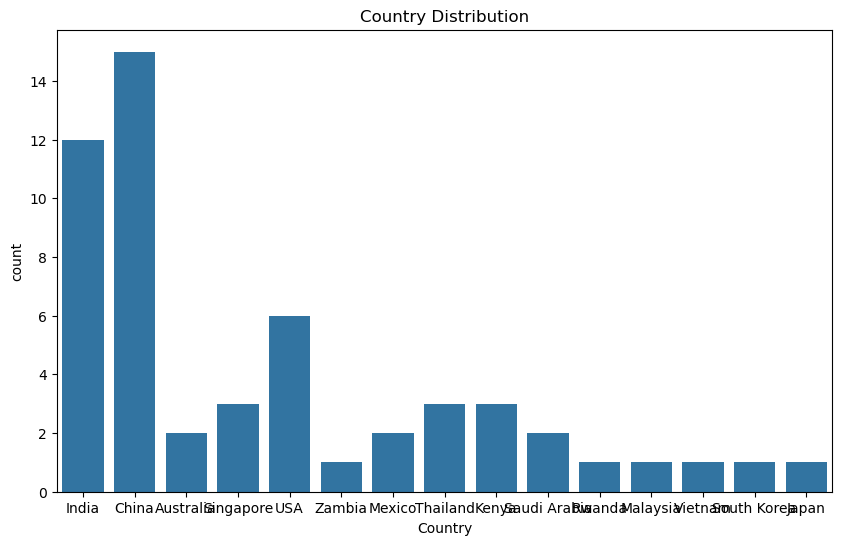

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country', data=df)
plt.title('Country Distribution')
plt.show()


<Axes: xlabel='Study type'>

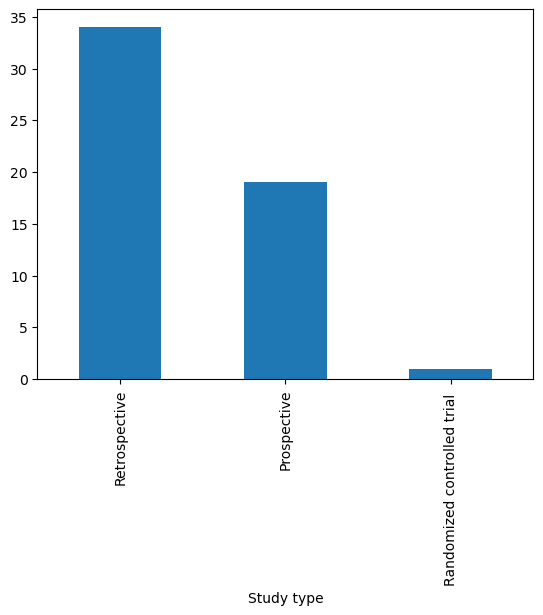

In [98]:
df["Study type"].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

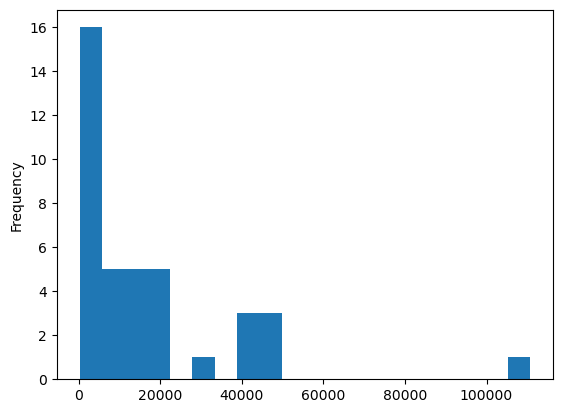

In [99]:
df["Number of participants or images"].plot(kind='hist', bins=20)

In [100]:
# Remove duplicate rows based on 'Study type' column
df_study_type = df[['Study type', 'Number of participants or images']].drop_duplicates()



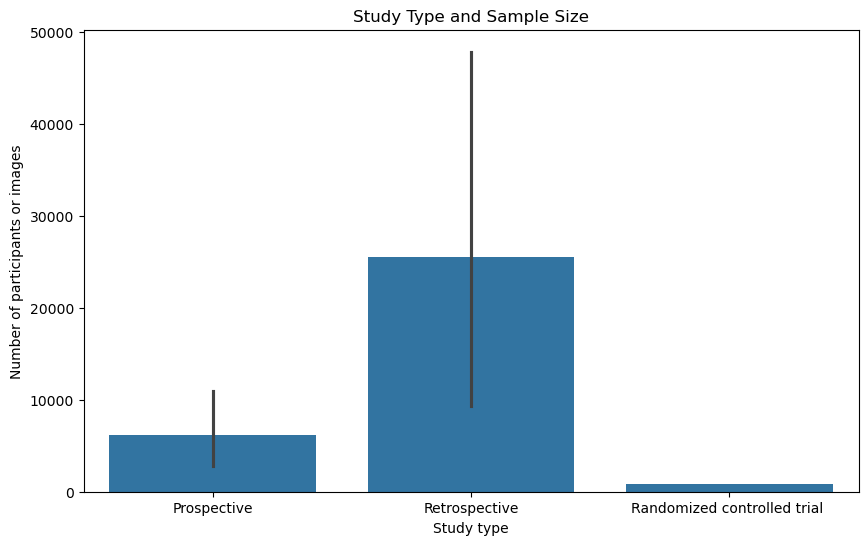

In [101]:
# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Study type', y='Number of participants or images', data=df_study_type)
plt.title('Study Type and Sample Size')
plt.show()

In [102]:
# Remove duplicate rows based on specific columns
df_scatter = df[['Sensitivity (95% CI) for referable DR', 'Specificity (95% CI) for referable DR']].drop_duplicates()


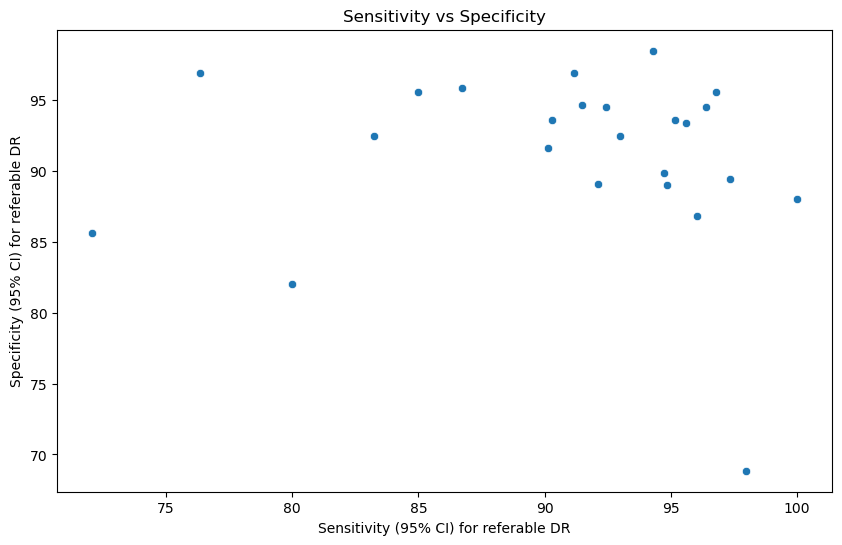

In [103]:
# Plot the scatter chart
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sensitivity (95% CI) for referable DR', y='Specificity (95% CI) for referable DR', data=df_scatter)
plt.title('Sensitivity vs Specificity')
plt.show()

<Axes: ylabel='Frequency'>

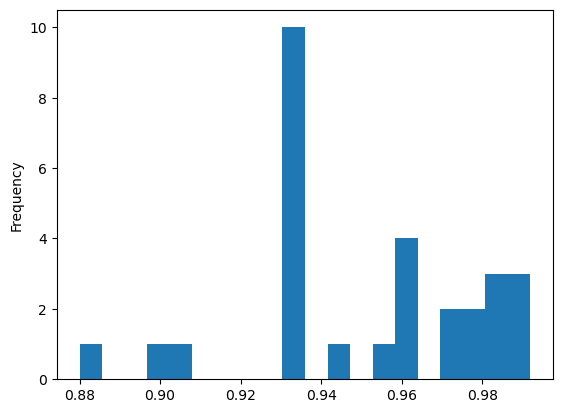

In [104]:
df["AUC (95% CI) for referable DR"].plot(kind='hist', bins=20)

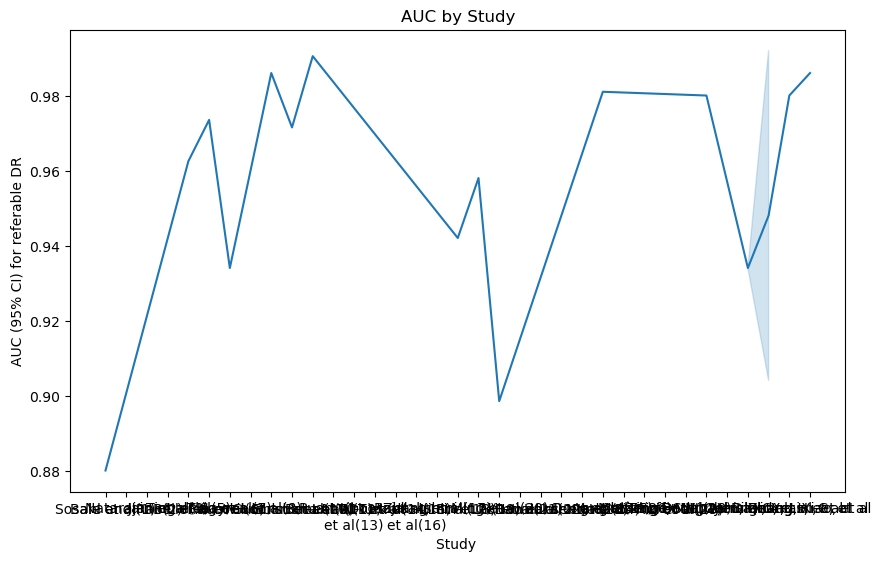

In [105]:
df = df.reset_index(drop=True)

# Plot the line chart
plt.figure(figsize=(10,6))
sns.lineplot(x=df.columns[0], y='AUC (95% CI) for referable DR', data=df)
plt.title('AUC by Study')
plt.show()

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


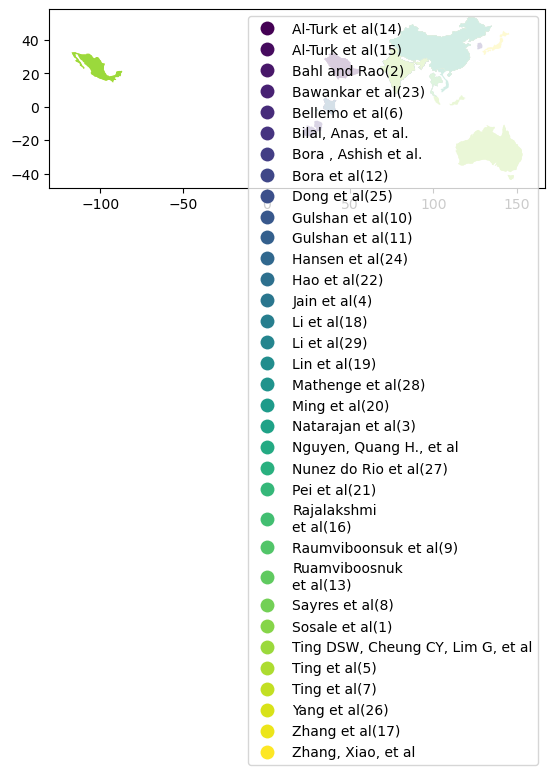

In [106]:
# Download the Natural Earth data manually and save it as a shapefile
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Print the column names of the world GeoDataFrame
print(world.columns)

# Merge the country data with the boundaries
# Replace 'name' with the actual column name that contains the country names
merged = world.merge(df, left_on='ADMIN', right_on='Country')

# Plot the map
merged.plot(column='Study ', cmap='viridis', legend=True)

# Show the plot
plt.show()

In [107]:

# Download the Natural Earth data manually and save it as a shapefile
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Merge the country data with the boundaries
merged = world.merge(df, left_on='ADMIN', right_on='Country')

# Create a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add country boundaries to the map
folium.GeoJson(merged.__geo_interface__).add_to(m)

# Add markers for each country
for index, row in merged.iterrows():
    folium.Marker(location=[row.geometry.centroid.y, row.geometry.centroid.x], 
                    tooltip=row['ADMIN'], 
                    popup=row['Study ']).add_to(m)

# Save the map as an HTML file
m.save('country_map.html')

In [108]:

# Download the Natural Earth data manually and save it as a shapefile
world = gpd.read_file('ne_110m_admin_0_countries.shp')
africa = world[world['CONTINENT'] == 'Africa']

# Merge the country data with the boundaries
merged = world.merge(df, left_on='ADMIN', right_on='Country')

# Create a Folium map
m = folium.Map(location=[10, 20], zoom_start=4)

# Add country boundaries to the map
folium.GeoJson(merged.__geo_interface__).add_to(m)

# Add markers for each country
for index, row in merged.iterrows():
    folium.Marker(location=[row.geometry.centroid.y, row.geometry.centroid.x], 
                    tooltip=row['ADMIN'], 
                    popup=row['Study ']).add_to(m)

# Save the map as an HTML file
m.save('africa_map.html')

In [109]:
# Download the Natural Earth data manually and save it as a shapefile
africa = gpd.read_file('ne_110m_admin_0_countries.shp')
africa = africa[africa['CONTINENT'] == 'Africa']

# Merge the country data with the boundaries
merged = africa.merge(df, left_on='ADMIN', right_on='Country')

# Create a table with the desired columns
table = merged[['Study ', 'Country', 'Sensitivity (95% CI) for referable DR', 
                 'Specificity (95% CI) for referable DR', 
                 'AUC (95% CI) for referable DR']]



In [110]:
table

,Study,Country,Sensitivity (95% CI) for referable DR,Specificity (95% CI) for referable DR,AUC (95% CI) for referable DR
0,Al-Turk et al(14),Kenya,94.73,89.84,NaN
1,Al-Turk et al(15),Kenya,92.43,94.50,NaN
2,Hansen et al(24),Kenya,NaN,NaN,NaN
3,Bellemo et al(6),Zambia,92.11,89.07,0.9735
4,Mathenge et al(28),Rwanda,NaN,NaN,NaN


In [111]:
# Download the Natural Earth data manually and save it as a shapefile
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Merge the country data with the boundaries
merged = world.merge(df, left_on='ADMIN', right_on='Country')

# Create a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add country boundaries to the map
folium.GeoJson(merged.__geo_interface__).add_to(m)

# Add markers with study values
for index, row in merged.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(7,20),
            html=f'<div style="font-size: 12pt; color : black">{row["Study "]}</div>'
        ),
        tooltip=row['ADMIN']
    ).add_to(m)

# Save the map as an HTML file
m.save('country_map_2.html')

In [112]:
import re
# Clean and preprocess the 'Study ' column
df['Study '] = df['Study '].apply(lambda x: re.findall(r'\d+\.?\d*', x))
df['Study '] = df['Study '].apply(lambda x: [float(i) for i in x])
df['Study '] = df['Study '].apply(lambda x: np.mean(x))


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [113]:

# Merge the country data with the boundaries
merged = world.merge(df, left_on='ADMIN', right_on='Country')

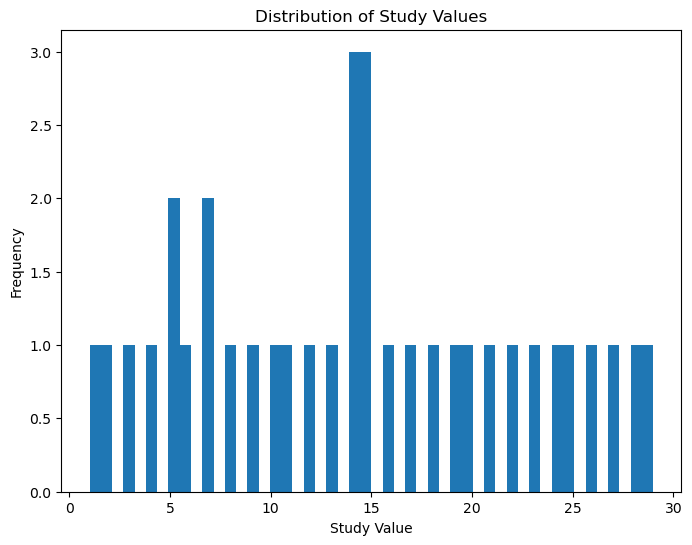

In [114]:
# Plot the distribution of study values
plt.figure(figsize=(8, 6))
plt.hist(merged['Study '], bins=50)
plt.title('Distribution of Study Values')
plt.xlabel('Study Value')
plt.ylabel('Frequency')
plt.show()

In [115]:
# Drop rows with NaN values
df = df.dropna(subset=['Sensitivity (95% CI) for referable DR', 
                           'Specificity (95% CI) for referable DR', 
                           'AUC (95% CI) for referable DR'])


In [116]:

# Define the Study groups
study_groups = df['Study '].unique()

In [117]:
# Initialize lists to store the results
sensitivity_values = []
specificity_values = []
auc_values = []

In [118]:
# Iterate over each Study group
for study in study_groups:
    study_df = df[df['Study '] == study]
    
    # Extract the sensitivity and specificity values
    sensitivity = study_df['Sensitivity (95% CI) for referable DR'].mean()
    specificity = study_df['Specificity (95% CI) for referable DR'].mean()
    auc = study_df['AUC (95% CI) for referable DR'].mean()
    
    # Append the values to the lists
    sensitivity_values.append(sensitivity)
    specificity_values.append(specificity)
    auc_values.append(auc)

In [119]:
# Print the results
for i, study in enumerate(study_groups):
    print(f"Study: {study}")
    print(f"Sensitivity: {sensitivity_values[i]:.2f}")
    print(f"Specificity: {specificity_values[i]:.2f}")
    print(f"AUC: {auc_values[i]:.2f}")
    print("------------------------")

Study: 1.0
Sensitivity: 93.00
Specificity: 92.50
AUC: 0.88
------------------------
Study: 6.0
Sensitivity: 92.11
Specificity: 89.07
AUC: 0.97
------------------------
Study: 7.0
Sensitivity: 90.15
Specificity: 91.60
AUC: 0.93
------------------------
Study: 9.0
Sensitivity: 94.30
Specificity: 98.50
AUC: 0.99
------------------------
Study: 10.0
Sensitivity: 90.30
Specificity: 93.60
AUC: 0.97
------------------------
Study: 11.0
Sensitivity: 95.18
Specificity: 93.63
AUC: 0.99
------------------------
Study: 18.0
Sensitivity: 85.00
Specificity: 95.60
AUC: 0.94
------------------------
Study: 20.0
Sensitivity: 76.35
Specificity: 96.95
AUC: 0.90
------------------------
Study: nan
Sensitivity: nan
Specificity: nan
AUC: nan
------------------------


In [120]:
mean_study_value = merged['Study '].mean()
median_study_value = merged['Study '].median()
print(f'Mean Study Value: {mean_study_value:.2f}')
print(f'Median Study Value: {median_study_value:.2f}')

Mean Study Value: 14.43
Median Study Value: 14.00


In [121]:
# Visualize the results on a map
m = folium.Map(location=[20, 0], zoom_start=2)
for index, row in merged.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(7,20),
            html=f'<div style="font-size: 12pt; color : black">Study Value: {row["Study "]}</div>'
        ),
        tooltip=row['Country']
    ).add_to(m)
m.save('results_map.html')

<Axes: ylabel='Frequency'>

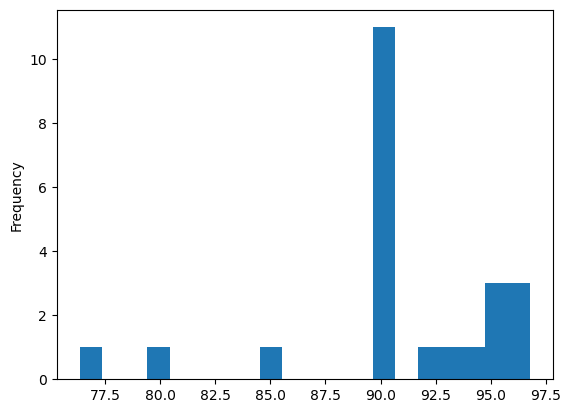

In [122]:
df["Sensitivity (95% CI) for referable DR"].plot(kind='hist', bins=20)

In [123]:
# Drop rows with NaN values in the 'Sensitivity (95% CI) for referable DR' column
df = df.dropna(subset=['Sensitivity (95% CI) for referable DR'])
df = df.dropna(subset=['Study '])


In [124]:
from sklearn.metrics import roc_curve, auc as sklearn_auc

In [125]:

# Drop rows with NaN values in the 'Study ' column and 'Sensitivity (95% CI) for referable DR' column
df = df.dropna(subset=['Study ', 'Sensitivity (95% CI) for referable DR'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Study ']], df['Sensitivity (95% CI) for referable DR'], test_size=0.2, random_state=42)

# Since y_test is sensitivity scores, we need to convert them into binary labels
# Let's assume that sensitivity scores above 0.5 are considered positive
y_test_binary = (y_test > 0.5).astype(int)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


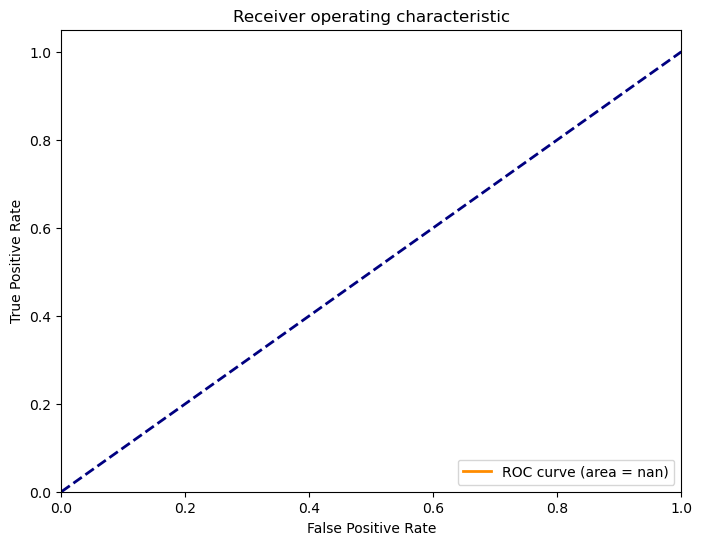

In [126]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test)
roc_auc = sklearn_auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

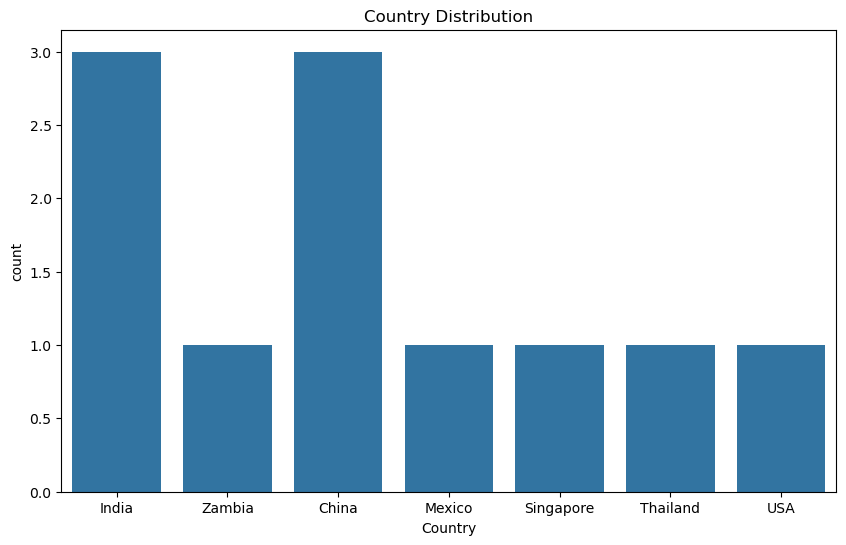

In [127]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country', data=df)
plt.title('Country Distribution')
plt.show()

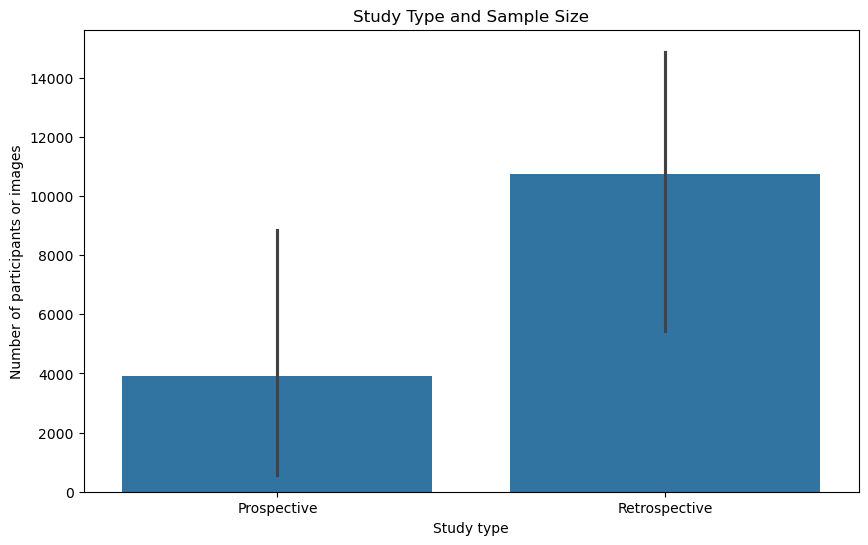

In [128]:
plt.figure(figsize=(10,6))
sns.barplot(x='Study type', y='Number of participants or images', data=df)
plt.title('Study Type and Sample Size')
plt.show()

In [129]:
# Performance metrics
print("\nPerformance Metrics:")
print(df[['Sensitivity (95% CI) for referable DR', 'Specificity (95% CI) for referable DR', 'AUC (95% CI) for referable DR']])


Performance Metrics:
    Sensitivity (95% CI) for referable DR  \
0                                   93.00   
8                                   92.11   
9                                   90.15   
10                                  90.15   
11                                  90.15   
14                                  94.30   
15                                  90.30   
16                                  95.18   
17                                  95.18   
29                                  85.00   
31                                  76.35   

    Specificity (95% CI) for referable DR  AUC (95% CI) for referable DR  
0                                   92.50                         0.8800  
8                                   89.07                         0.9735  
9                                   91.60                         0.9340  
10                                  91.60                         0.9340  
11                                  91.60                     

In [130]:
# Filter out studies with missing performance metrics
df_performance = df.dropna(subset=['Sensitivity (95% CI) for referable DR', 'Specificity (95% CI) for referable DR', 'AUC (95% CI) for referable DR'])

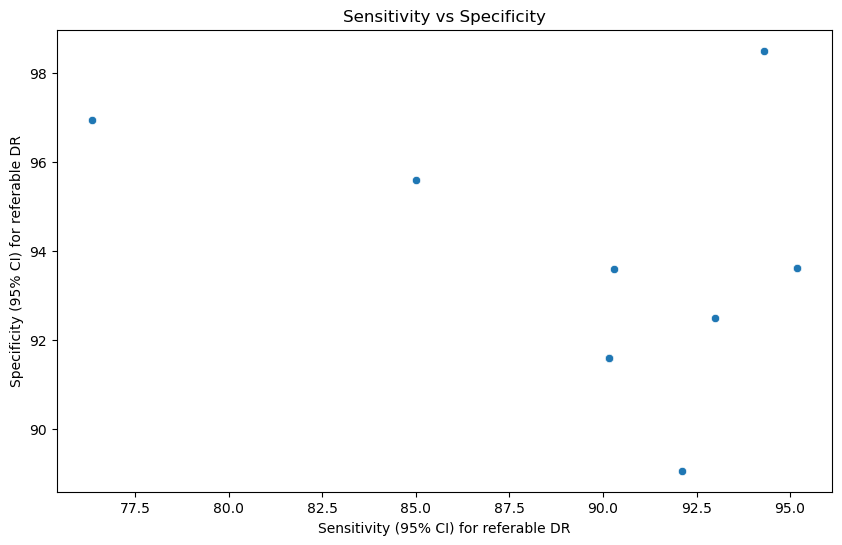

In [131]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sensitivity (95% CI) for referable DR', y='Specificity (95% CI) for referable DR', data=df_performance)
plt.title('Sensitivity vs Specificity')
plt.show()

In [132]:
# create a profiling report and display it in the notebook
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [133]:
df['Country'].unique()

array(['India', 'Zambia', 'China', 'Mexico', 'Singapore', 'Thailand',
       'USA'], dtype=object)

In [134]:
df

,Study,Country,AI system name/ developer,Study type,Number of participants or images,Who provided the reference standard,DR classification system used,Sensitivity (95% CI) for referable DR,Specificity (95% CI) for referable DR,AUC (95% CI) for referable DR,Referable DR threshold,Other reported outcomes,Country
0,1.0,India,Medios Al,Prospective,922.0,Five retinal specialists,ICDRS,93.00,92.50,0.8800,Moderate NPDR or worse and/or presence of DME,NaN,India
8,6.0,Zambia,SELENA+,Retrospective,1574.0,Two trained graders,ICDRS,92.11,89.07,0.9735,"Moderate NOPDR or worse, DME or an ungradable...",NaN,Zambia
9,7.0,"China,Mexico,Singapore",SELENA+,Retrospective,14880.0,Varied between datasets,ICDRS,90.15,91.60,0.9340,") Moderate NODR or worse, DME or an ungradable...",DLS performance for detecting possible glaucom...,China
10,7.0,"China,Mexico,Singapore",SELENA+,Retrospective,14880.0,Varied between datasets,ICDRS,90.15,91.60,0.9340,") Moderate NODR or worse, DME or an ungradable...",DLS performance for detecting possible glaucom...,Mexico
11,7.0,"China,Mexico,Singapore",SELENA+,Retrospective,14880.0,Varied between datasets,ICDRS,90.15,91.60,0.9340,") Moderate NODR or worse, DME or an ungradable...",DLS performance for detecting possible glaucom...,Singapore
14,9.0,Thailand,Google,Retrospective,7517.0,Two retinal specialists,ICDRS,94.30,98.50,0.9860,"Publication did not specify RDR, these figure...",Algorithm was\nstatistically significantly\nbe...,Thailand
15,10.0,India,Google,Prospective,3049.0,A trained grader and\na retinal specialist,ICDRS,90.30,93.60,0.9715,Moderate NPDR\nor worse and/or\npresence of DME,NaN,India
16,11.0,"India,USA",Google,Retrospective,NaN,Seven and eight\nophthalmologists\ngraded the ...,ICDRS,95.18,93.63,0.9905,Moderate NPDR\nor worse and/or\npresence of DME,Algorithm performance\ntested at different cut...,India
17,11.0,"India,USA",Google,Retrospective,NaN,Seven and eight\nophthalmologists\ngraded the ...,ICDRS,95.18,93.63,0.9905,Moderate NPDR\nor worse and/or\npresence of DME,Algorithm performance\ntested at different cut...,USA
29,18.0,China,VolexCloud,Prospective,11476.0,One certified retinal\nspecialist,ICDRS,85.00,95.60,0.9420,Moderate NPDR or\nworse (macular signs\nnot s...,389 images were\nungradable using DLA\nbut wer...,China
